In [2]:
%load_ext autoreload
%autoreload 2

In [18]:
import sys
sys.path.append('..')
from lib.vis import plot_session_intervals
from lib.course import LECTURES, ASSIGNMENTS
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, date
import datetime as dt
import pandas as pd

In [4]:
lecture = LECTURES[4]
df = lecture.viewing_data()

In [5]:
df

,Timestamp,Start Position,Minutes Delivered,User ID,End Position
0,2019-10-14 22:32:03,0.000000,0.048821,c799d499-6e22-4882-b6fd-67590919c0fe,2.929243
1,2019-10-14 22:32:03,2.684818,0.030246,c799d499-6e22-4882-b6fd-67590919c0fe,4.499557
2,2019-10-14 22:32:03,222.246793,0.016869,c799d499-6e22-4882-b6fd-67590919c0fe,223.258944
3,2019-10-14 22:32:03,166.685095,0.027330,c799d499-6e22-4882-b6fd-67590919c0fe,168.324891
4,2019-10-14 22:32:03,127.791906,2.794202,c799d499-6e22-4882-b6fd-67590919c0fe,295.444028
...,...,...,...,...,...
1835,2019-10-08 07:54:30,2422.269765,0.257945,a14d56a2-296e-41e1-8f05-aad8014db639,2437.746474
1836,2019-10-08 07:55:00,2823.734367,0.621575,a14d56a2-296e-41e1-8f05-aad8014db639,2861.028869
1837,2019-10-08 07:55:30,2756.823599,35.326533,a14d56a2-296e-41e1-8f05-aad8014db639,4876.415604
1838,2019-10-08 08:18:36,5205.657672,0.033425,a14d56a2-296e-41e1-8f05-aad8014db639,5207.663152


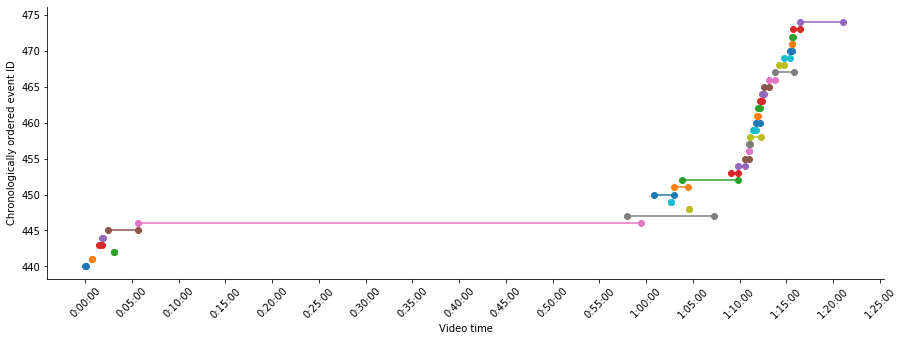

In [7]:
user_ids = df['User ID'].unique()
plot_session_intervals(df[df['User ID'] == user_ids[13]])

In [70]:
df[df['Timestamp'].dt.day == 26].groupby("User ID").count().shape[0]
df.groupby("User ID").sum()["Minutes Delivered"]

User ID
015bdad0-8d66-4c25-bdd5-a9d20041d58a      0.026395
053aede8-f36e-4eec-975d-a8b90120b53a     85.180563
05eb966b-d9fb-4394-af83-a9670047c0e8     12.853636
089a1d24-77e8-47ad-a5b1-aad401758b55     96.176167
0a787656-62c6-4471-8f52-a97b0065e6df     16.534874
15b814ea-91a2-4733-819d-a9ec015ecf0f     10.380596
1e13c3f3-9195-4638-9ebd-aad20065c690     86.733596
21168627-ddf7-4eca-b7b0-a9660104e28d     81.701952
25d221e2-007d-46a0-b36b-a965016712da     46.981212
35995a1c-0d3d-4f09-a29e-aad2001677b3     54.864049
39c7d95d-e5dc-4d7f-9d77-a8b700092328     79.634147
3b268a60-cef6-4303-b85f-a969016c615b     14.027544
3e072ff5-ff78-4f11-99e6-a90a00100c35     82.091252
3ea47bca-f943-4e4c-9360-a8b80000bc9c     79.209641
4a1c68d5-38ac-46a5-a143-a968003e8db8     79.611847
4a959b05-7009-4d10-9f0c-a920000e58e4      0.100170
53e0fae6-1d50-40be-bb16-a98901165365     79.195558
5cb72e04-e0fb-4480-89c4-a8630163f37f     70.330281
5d6ff8a1-5ae3-4235-aa39-a92201568450      0.274994
5dd1c7f2-2ebf-4c42-a249

In [71]:
df

,Timestamp,Start Position,Minutes Delivered,User ID,End Position
0,2019-11-03 20:24:39,211.227436,0.039679,c799d499-6e22-4882-b6fd-67590919c0fe,213.608166
1,2019-11-03 20:24:39,143.993196,0.154131,c799d499-6e22-4882-b6fd-67590919c0fe,153.241060
2,2019-11-03 20:24:39,153.225584,0.412984,c799d499-6e22-4882-b6fd-67590919c0fe,178.004603
3,2019-11-03 20:25:09,178.099415,1.262772,c799d499-6e22-4882-b6fd-67590919c0fe,253.865715
4,2019-11-03 20:32:09,253.975339,9.145023,c799d499-6e22-4882-b6fd-67590919c0fe,802.676691
...,...,...,...,...,...
1189,2019-10-28 23:54:33,4730.030470,0.530233,7ca39010-b30b-4099-adf9-aae2006c5729,4761.844477
1190,2019-10-28 23:55:03,4796.635944,1.398081,7ca39010-b30b-4099-adf9-aae2006c5729,4880.520782
1191,2019-10-28 23:55:49,4880.670727,0.030769,7ca39010-b30b-4099-adf9-aae2006c5729,4882.516895
1192,2019-10-28 23:55:49,4955.831654,0.023111,7ca39010-b30b-4099-adf9-aae2006c5729,4957.218333


In [40]:
df_id = df.groupby('User ID')

In [41]:
df_per_person = df_id.groups
df_min = df_id.aggregate(np.min)
df_min

,Timestamp,Start Position,Minutes Delivered,End Position
User ID,,,,
015bdad0-8d66-4c25-bdd5-a9d20041d58a,2019-09-25 20:10:36,0.000000,0.036050,62.419232
03bf7fb9-fdca-40e4-bcfa-a8b2015c8ab4,2019-09-25 21:20:54,0.000000,0.020224,1.213439
053aede8-f36e-4eec-975d-a8b90120b53a,2019-09-25 18:51:37,130.601094,0.055126,140.075739
05eb966b-d9fb-4394-af83-a9670047c0e8,2019-09-25 22:01:54,0.000000,0.019587,2.096269
08633ab0-4cb9-4f34-9898-a9d6018521e1,2019-09-30 23:11:37,0.000000,0.103944,6.236647
...,...,...,...,...
f7feda5e-9c69-48a7-8800-a8c4012ff4d6,2019-09-25 19:31:20,0.000000,0.018406,29.253063
fa24f4d2-de8d-43c0-ae50-a9bc000e83c7,2019-09-25 21:02:11,0.000000,0.019813,3.291299
fa515b86-925a-4ab5-83bc-a8b6012ef847,2019-09-25 17:33:30,7.685123,0.016933,10.454689


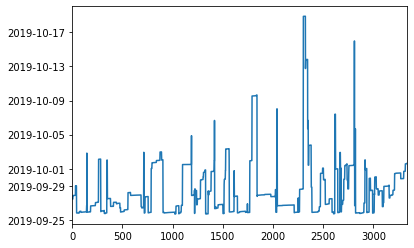

In [26]:
df['Timestamp'].plot()

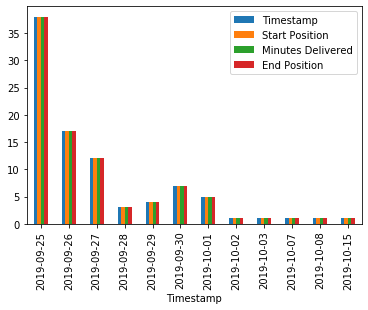

In [27]:
# df['Timestamp'] = df['Timestamp'].astype("datetime64")
df_min.groupby(df_min["Timestamp"].dt.date).count().plot(kind="bar")

In [6]:
counts = []
for date in range(1, 32):
    counts.append([date, df[df['Timestamp'].dt.day == date].groupby("User ID").count().shape[0]])

In [101]:
def plot_lectures(df, minimum_mins=10):
    counts = []
    start_date = dt.datetime(2019, 9, 20)
    end_date = dt.datetime(2019, 11, 15)
    daterange = pd.date_range(start_date, end_date)
    for date in daterange:
        unique_users = df[df['Timestamp'].dt.date == date].groupby("User ID")
        exceeding_minimum_mins = unique_users.sum()["Minutes Delivered"]>minimum_mins
        print(exceeding_minimum_mins)
        counts.append([date, exceeding_minimum_mins.shape[0]])
    plt.bar(np.array(counts)[:,0], np.array(counts)[:, 1], alpha=0.3)

<BarContainer object of 47 artists>

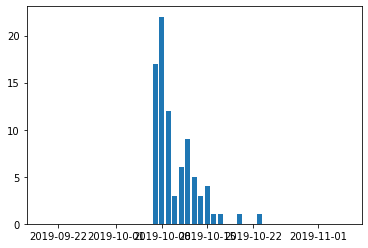

In [81]:
plt.bar(np.array(counts)[:,0], np.array(counts)[:, 1])

In [82]:
assignment = ASSIGNMENTS[4]
assignment.duedate
assignment.lectures

[Lecture(index=9, name='Mutability', date=datetime.datetime(2019, 10, 21, 0, 0)),
 Lecture(index=10, name='Control flow: branches', date=datetime.datetime(2019, 10, 23, 0, 0)),
 Lecture(index=11, name='Control flow: functions', date=datetime.datetime(2019, 10, 28, 0, 0))]

In [83]:
def plot_assignment(assignment):
    lectures = assignment.lectures
    print(lectures)
    for lecture in lectures:
        df = lecture.viewing_data()
        plot_lectures(df)
        plt.axvline(x=assignment.duedate)

[Lecture(index=2, name='Syntax and semantics', date=datetime.datetime(2019, 9, 25, 0, 0))]
[Lecture(index=3, name='Lambda calculus', date=datetime.datetime(2019, 9, 30, 0, 0)), Lecture(index=4, name='Type systems', date=datetime.datetime(2019, 10, 2, 0, 0))]
[Lecture(index=5, name='Functional basics', date=datetime.datetime(2019, 10, 7, 0, 0)), Lecture(index=6, name='Algebraic data types', date=datetime.datetime(2019, 10, 9, 0, 0))]
[Lecture(index=7, name='Parametric types', date=datetime.datetime(2019, 10, 14, 0, 0))]
[Lecture(index=9, name='Mutability', date=datetime.datetime(2019, 10, 21, 0, 0)), Lecture(index=10, name='Control flow: branches', date=datetime.datetime(2019, 10, 23, 0, 0)), Lecture(index=11, name='Control flow: functions', date=datetime.datetime(2019, 10, 28, 0, 0))]
[Lecture(index=12, name='Memory safety', date=datetime.datetime(2019, 10, 30, 0, 0))]


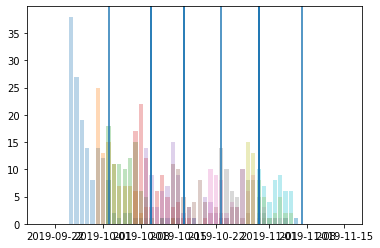

In [84]:
for assignment in ASSIGNMENTS:
    plot_assignment(assignment)

Series([], Name: Minutes Delivered, dtype: bool)
Series([], Name: Minutes Delivered, dtype: bool)
Series([], Name: Minutes Delivered, dtype: bool)
Series([], Name: Minutes Delivered, dtype: bool)
Series([], Name: Minutes Delivered, dtype: bool)
User ID
015bdad0-8d66-4c25-bdd5-a9d20041d58a    False
03bf7fb9-fdca-40e4-bcfa-a8b2015c8ab4    False
053aede8-f36e-4eec-975d-a8b90120b53a    False
05eb966b-d9fb-4394-af83-a9670047c0e8    False
0ad53fac-122b-4982-ba46-a96300966b16    False
165822a9-8c4c-4b10-8084-a96800d5c118    False
30a42b45-b9b5-4be8-a0f0-a9650154007f    False
35995a1c-0d3d-4f09-a29e-aad2001677b3    False
3e072ff5-ff78-4f11-99e6-a90a00100c35    False
3f51f0a9-8c3d-430c-9a12-aad10058833e    False
4a959b05-7009-4d10-9f0c-a920000e58e4    False
5cb72e04-e0fb-4480-89c4-a8630163f37f    False
5d6ff8a1-5ae3-4235-aa39-a92201568450    False
5dd1c7f2-2ebf-4c42-a249-a969002351f0    False
662beaf9-6a1b-4cb7-91b8-aa22017739de    False
6876a6bd-a0d9-4267-943a-a96b00000837    False
6b40dfbd-dd

Series([], Name: Minutes Delivered, dtype: bool)
Series([], Name: Minutes Delivered, dtype: bool)
Series([], Name: Minutes Delivered, dtype: bool)
Series([], Name: Minutes Delivered, dtype: bool)
Series([], Name: Minutes Delivered, dtype: bool)
Series([], Name: Minutes Delivered, dtype: bool)
Series([], Name: Minutes Delivered, dtype: bool)
Series([], Name: Minutes Delivered, dtype: bool)
Series([], Name: Minutes Delivered, dtype: bool)
Series([], Name: Minutes Delivered, dtype: bool)
Series([], Name: Minutes Delivered, dtype: bool)
Series([], Name: Minutes Delivered, dtype: bool)
Series([], Name: Minutes Delivered, dtype: bool)
Series([], Name: Minutes Delivered, dtype: bool)
Series([], Name: Minutes Delivered, dtype: bool)
Series([], Name: Minutes Delivered, dtype: bool)
Series([], Name: Minutes Delivered, dtype: bool)
Series([], Name: Minutes Delivered, dtype: bool)
Series([], Name: Minutes Delivered, dtype: bool)
Series([], Name: Minutes Delivered, dtype: bool)
Series([], Name: Min

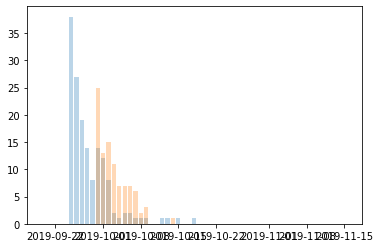

In [102]:
lecture = LECTURES[1]
df = lecture.viewing_data()
plot_lectures(df, 100)

lecture = LECTURES[2]
df = lecture.viewing_data()

plot_lectures(df, 10)